In [12]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [13]:
# Drop the non-beneficial ID columns
application_df = application_df.drop(columns=["EIN"], axis = 1)
application_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [14]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [19]:
# Look at NAME value counts for binning
name_count = application_df.NAME.value_counts()
name_count

PARENT BOOSTER USA INC                             1260
TOPS CLUB INC                                       765
UNITED STATES BOWLING CONGRESS INC                  700
WASHINGTON STATE UNIVERSITY                         492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC     408
                                                   ... 
NORTHWEST KANSAS INMATE RESOURCE COUNCIL INC          1
OREGON ASSOCIATION FOR BEHAVIOR ANALYSIS              1
CO STUDIO                                             1
LONGVIEW ACT                                          1
CARE 365 CHRISTMAS CARE FUND                          1
Name: NAME, Length: 19568, dtype: int64

In [20]:
# How many names applied less than or euqal to 8
name_count[name_count<=8]

ICE AGE FLOODS INSTITUTE                                                8
NATIONAL SOCIETY DAUGHTERS OF THE BRITISH EMPIRE IN THE UNITED STATE    8
WYOMING CONGRESS OF PARENT AND TEACHERS ASSOCIATION                     8
CIRCLE K INTERNATIONAL INC                                              8
VFW AUXILIARY DEPT OF HAWAII                                            8
                                                                       ..
NORTHWEST KANSAS INMATE RESOURCE COUNCIL INC                            1
OREGON ASSOCIATION FOR BEHAVIOR ANALYSIS                                1
CO STUDIO                                                               1
LONGVIEW ACT                                                            1
CARE 365 CHRISTMAS CARE FUND                                            1
Name: NAME, Length: 19314, dtype: int64

<AxesSubplot:ylabel='Density'>

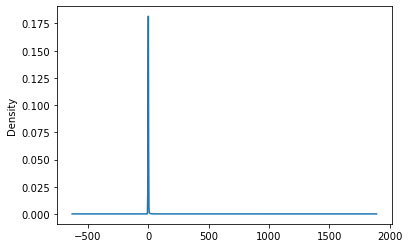

In [21]:
name_count.plot.density()

In [22]:
# Determine which values to replace if counts are less than or equal to 8
replace_application = list(name_count[name_count <= 8].index)

# Replace in DataFrame
for app in replace_application:
    application_df.NAME = application_df.NAME.replace(app,"Other")

# Check to make sure binning was successful
application_df.NAME.value_counts()

Other                                             20734
PARENT BOOSTER USA INC                             1260
TOPS CLUB INC                                       765
UNITED STATES BOWLING CONGRESS INC                  700
WASHINGTON STATE UNIVERSITY                         492
                                                  ...  
PAGAN PRIDE PROJECT INC                               9
NATIONAL NETWORK OF ABORTION FUNDS                    9
NATIONAL CHRISTIAN CHARITABLE FOUNDATION INC          9
SEATTLE CHILDRENS HOSPITAL                            9
VICTORY NEW TESTAMENT FELLOWSHIP INTERNATIONAL        9
Name: NAME, Length: 255, dtype: int64

In [23]:
# Look at APPLICATION_TYPE value counts for binning
app_typecount = application_df.APPLICATION_TYPE.value_counts()
app_typecount

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [24]:
# Determine which values to replace if counts are less than 500?
replace_application = list(app_typecount[app_typecount < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [25]:
# Look at CLASSIFICATION value counts for binning
classification_count = application_df.CLASSIFICATION.value_counts()
classification_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C8210        1
C1245        1
C4200        1
C2190        1
C4500        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [26]:
# Determine which values to replace if counts are less than 1000
replace_class = list(classification_count[classification_count < 1000].index) 

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [28]:
# Generate our categorical variable lists
application_cat = ["NAME", "APPLICATION_TYPE", "AFFILIATION", "CLASSIFICATION", "USE_CASE", "ORGANIZATION", "INCOME_AMT", 
           "SPECIAL_CONSIDERATIONS"]

In [29]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALPHA PHI OMEGA,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,NAME_ALTRUSA INTERNATIONAL FOUNDATION INC,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True).drop(columns=application_cat, axis = 1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALPHA PHI OMEGA,NAME_ALPHA PHI SIGMA,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL
X = application_df.drop("IS_SUCCESSFUL", axis = 1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, stratify = y)

In [32]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [33]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input_features = len(X_train_scaled[0])
nodes_hidden_layer1 = 100
nodes_hidden_layer2 = 30
nodes_hidden_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units = nodes_hidden_layer1, input_dim = num_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units = nodes_hidden_layer2, activation = "sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_hidden_layer3, activation = "sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               29900     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 33,251
Trainable params: 33,251
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [37]:
# Compile the model
nn.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [38]:
# Create a callback that saves the model's weight every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [39]:
# Train the model
model_fit = nn.fit(X_train_scaled, y_train, epochs = 100, callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 3:53 - loss: 0.7122 - accuracy: 0.5312
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 21/804 [..............................] - ETA: 2s - loss: 0.6958 - accuracy: 0.5419  
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 41/804 [>.............................] - ETA: 2s - loss: 0.6887 - accuracy: 0.5485
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 61/804 [=>.........................

521/804 [==================>...........] - ETA: 0s - loss: 0.5881 - accuracy: 0.7053
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 0.5861 - accuracy: 0.7069
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
556/804 [===================>..........] - ETA: 0s - loss: 0.5842 - accuracy: 0.7085
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
576/804 [====================>.........] - ETA: 0s - loss: 0.5821 - accuracy: 0.7101
Epoch 00001: saving model


Epoch 00002: saving model to checkpoints\weights.02.hdf5
237/804 [=======>......................] - ETA: 1s - loss: 0.4770 - accuracy: 0.7695
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
257/804 [========>.....................] - ETA: 1s - loss: 0.4758 - accuracy: 0.7706
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
277/804 [=========>....................] - ETA: 1s - loss: 0.4747 - accuracy: 0.7715
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02

757/804 [===========================>..] - ETA: 0s - loss: 0.4627 - accuracy: 0.7797
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.4625 - accuracy: 0.7798
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.4623 - accuracy: 0.7799
Epoch 00002: saving model to checkpoints\weights.02.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.4622 - accuracy: 0.7799
Epoch 3/100
  1/804 [..............................] - ETA: 0s - loss: 0.5606 - accuracy: 0.7188
Epoch 00003: saving model to checkpoints

458/804 [================>.............] - ETA: 0s - loss: 0.4440 - accuracy: 0.7912
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
478/804 [================>.............] - ETA: 0s - loss: 0.4440 - accuracy: 0.7912
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
498/804 [=================>............] - ETA: 0s - loss: 0.4440 - accuracy: 0.7911
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
518/804 [==================>...........] - ETA: 0s -

159/804 [====>.........................] - ETA: 1s - loss: 0.4369 - accuracy: 0.7822
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
179/804 [=====>........................] - ETA: 1s - loss: 0.4377 - accuracy: 0.7824
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
199/804 [======>.......................] - ETA: 1s - loss: 0.4384 - accuracy: 0.7826
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
219/804 [=======>......................] - ETA: 1s -

Epoch 00004: saving model to checkpoints\weights.04.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.4427 - accuracy: 0.7850
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.4427 - accuracy: 0.7850
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.4426 - accuracy: 0.7851
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.


Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
390/804 [=============>................] - ETA: 1s - loss: 0.4376 - accuracy: 0.7904
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
410/804 [==============>...............] - ETA: 1s - loss: 0.4377 - accuracy: 0.7903
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
430/804 [===============>..............] - ETA: 0s - loss: 0.4378 - accuracy: 0.7902
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05


Epoch 00006: saving model to checkpoints\weights.06.hdf5
101/804 [==>...........................] - ETA: 1s - loss: 0.4220 - accuracy: 0.7901
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
122/804 [===>..........................] - ETA: 1s - loss: 0.4237 - accuracy: 0.7904
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
141/804 [====>.........................] - ETA: 1s - loss: 0.4256 - accuracy: 0.7900
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06


Epoch 00006: saving model to checkpoints\weights.06.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 0.4354 - accuracy: 0.7895
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.4354 - accuracy: 0.7896
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.4354 - accuracy: 0.7897
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
337/804 [===========>..................] - ETA: 1s - loss: 0.4490 - accuracy: 0.7847
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
357/804 [============>.................] - ETA: 1s - loss: 0.4483 - accuracy: 0.7850
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
377/804 [=============>................] - ETA: 1s - loss: 0.4477 - accuracy: 0.7853
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.


Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
 38/804 [>.............................] - ETA: 2s - loss: 0.4073 - accuracy: 0.8004
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 0.4147 - accuracy: 0.7970
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
 78/804 [=>............................] - ETA: 1s - loss: 0.4183 - accuracy: 0.7967
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08


Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
558/804 [===================>..........] - ETA: 0s - loss: 0.4300 - accuracy: 0.7938
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 0.4301 - accuracy: 0.7937
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.4301 - accuracy: 0.7937
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08

259/804 [========>.....................] - ETA: 1s - loss: 0.4301 - accuracy: 0.7899
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
279/804 [=========>....................] - ETA: 1s - loss: 0.4303 - accuracy: 0.7900
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 0.4304 - accuracy: 0.7901
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
319/804 [==========>...................] - ETA: 1s -


Epoch 00009: saving model to checkpoints\weights.09.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.4296 - accuracy: 0.7928
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.4296 - accuracy: 0.7928
Epoch 10/100
  1/804 [..............................] - ETA: 0s - loss: 0.2913 - accuracy: 0.8750
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
 20/804 [..............................] - ETA: 2s - loss: 0.4021 - accuracy: 0.8160
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 0


Epoch 00010: saving model to checkpoints\weights.10.hdf5
500/804 [=================>............] - ETA: 0s - loss: 0.4337 - accuracy: 0.7896
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
520/804 [==================>...........] - ETA: 0s - loss: 0.4337 - accuracy: 0.7897
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.4336 - accuracy: 0.7897
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10

201/804 [======>.......................] - ETA: 1s - loss: 0.4276 - accuracy: 0.7933
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
221/804 [=======>......................] - ETA: 1s - loss: 0.4271 - accuracy: 0.7936
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
241/804 [=======>......................] - ETA: 1s - loss: 0.4267 - accuracy: 0.7939
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
261/804 [========>.....................] - ETA: 1s -

721/804 [=========================>....] - ETA: 0s - loss: 0.4275 - accuracy: 0.7944
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.4276 - accuracy: 0.7943
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.4277 - accuracy: 0.7943
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
781/804 [============================>.] - ETA: 0s -


Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
437/804 [===============>..............] - ETA: 0s - loss: 0.4287 - accuracy: 0.7936
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
457/804 [================>.............] - ETA: 0s - loss: 0.4288 - accuracy: 0.7935
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
479/804 [================>.............] - ETA: 0s - loss: 0.4289 - accuracy: 0.7934
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12

Epoch 00013: saving model to checkpoints\weights.13.hdf5
138/804 [====>.........................] - ETA: 1s - loss: 0.4166 - accuracy: 0.8080
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
158/804 [====>.........................] - ETA: 1s - loss: 0.4171 - accuracy: 0.8069
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
178/804 [=====>........................] - ETA: 1s - loss: 0.4183 - accuracy: 0.8056
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.


Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 0.4264 - accuracy: 0.7960
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.4265 - accuracy: 0.7960
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.4266 - accuracy: 0.7959
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13

359/804 [============>.................] - ETA: 1s - loss: 0.4314 - accuracy: 0.7887
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
379/804 [=============>................] - ETA: 1s - loss: 0.4311 - accuracy: 0.7891
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
399/804 [=============>................] - ETA: 1s - loss: 0.4308 - accuracy: 0.7895
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
419/804 [==============>...............] - ETA: 1s -

 60/804 [=>............................] - ETA: 1s - loss: 0.4061 - accuracy: 0.8020
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
 80/804 [=>............................] - ETA: 1s - loss: 0.4104 - accuracy: 0.7997
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
100/804 [==>...........................] - ETA: 1s - loss: 0.4117 - accuracy: 0.7996
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
120/804 [===>..........................] - ETA: 1s -

580/804 [====================>.........] - ETA: 0s - loss: 0.4210 - accuracy: 0.7941
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.4213 - accuracy: 0.7939
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 0.4215 - accuracy: 0.7938
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
640/804 [======================>.......] - ETA: 0s -

281/804 [=========>....................] - ETA: 1s - loss: 0.4279 - accuracy: 0.7972
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 0.4277 - accuracy: 0.7973
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
321/804 [==========>...................] - ETA: 1s - loss: 0.4275 - accuracy: 0.7973
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
341/804 [===========>..................] - ETA: 1s -

804/804 [==============================] - 2s 3ms/step - loss: 0.4252 - accuracy: 0.7967
Epoch 17/100
  1/804 [..............................] - ETA: 0s - loss: 0.3966 - accuracy: 0.8125
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.4317 - accuracy: 0.8052
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
 37/804 [>.............................] - ETA: 2s - loss: 0.4268 - accuracy: 0.8009
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 0


Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
517/804 [==================>...........] - ETA: 0s - loss: 0.4247 - accuracy: 0.7968
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
537/804 [===================>..........] - ETA: 0s - loss: 0.4246 - accuracy: 0.7968
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
557/804 [===================>..........] - ETA: 0s - loss: 0.4247 - accuracy: 0.7968
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17

Epoch 00018: saving model to checkpoints\weights.18.hdf5
218/804 [=======>......................] - ETA: 1s - loss: 0.4206 - accuracy: 0.7927
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
238/804 [=======>......................] - ETA: 1s - loss: 0.4204 - accuracy: 0.7931
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
258/804 [========>.....................] - ETA: 1s - loss: 0.4204 - accuracy: 0.7934
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.

738/804 [==========================>...] - ETA: 0s - loss: 0.4223 - accuracy: 0.7947
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.4224 - accuracy: 0.7947
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.4224 - accuracy: 0.7947
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
798/804 [============================>.] - ETA: 0s -

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
454/804 [===============>..............] - ETA: 0s - loss: 0.4232 - accuracy: 0.8040
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
474/804 [================>.............] - ETA: 0s - loss: 0.4232 - accuracy: 0.8037
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
494/804 [=================>............] - ETA: 0s - loss: 0.4232 - accuracy: 0.8034
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
160/804 [====>.........................] - ETA: 1s - loss: 0.4254 - accuracy: 0.7911
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
180/804 [=====>........................] - ETA: 1s - loss: 0.4249 - accuracy: 0.7917
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
200/804 [======>.......................] - ETA: 1s - loss: 0.4248 - accuracy: 0.7921
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.


Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.4216 - accuracy: 0.7962
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.4216 - accuracy: 0.7962
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.4217 - accuracy: 0.7961
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20

Epoch 00021: saving model to checkpoints\weights.21.hdf5
381/804 [=============>................] - ETA: 1s - loss: 0.4236 - accuracy: 0.7962
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
401/804 [=============>................] - ETA: 1s - loss: 0.4237 - accuracy: 0.7962
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
422/804 [==============>...............] - ETA: 0s - loss: 0.4238 - accuracy: 0.7963
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
 98/804 [==>...........................] - ETA: 1s - loss: 0.4113 - accuracy: 0.8101
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
119/804 [===>..........................] - ETA: 1s - loss: 0.4127 - accuracy: 0.8088
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
137/804 [====>.........................] - ETA: 1s - loss: 0.4139 - accuracy: 0.8078
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.


Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
622/804 [======================>.......] - ETA: 0s - loss: 0.4199 - accuracy: 0.8003
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 0.4200 - accuracy: 0.8002
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.4201 - accuracy: 0.8001
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22

313/804 [==========>...................] - ETA: 1s - loss: 0.4219 - accuracy: 0.7900
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
333/804 [===========>..................] - ETA: 1s - loss: 0.4222 - accuracy: 0.7898
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
353/804 [============>.................] - ETA: 1s - loss: 0.4226 - accuracy: 0.7897
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
373/804 [============>.................] - ETA: 1s -

 19/804 [..............................] - ETA: 2s - loss: 0.4178 - accuracy: 0.7854
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
 39/804 [>.............................] - ETA: 2s - loss: 0.4104 - accuracy: 0.7945
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 0.4103 - accuracy: 0.7958
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
 79/804 [=>............................] - ETA: 2s -

539/804 [===================>..........] - ETA: 0s - loss: 0.4228 - accuracy: 0.7948
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
559/804 [===================>..........] - ETA: 0s - loss: 0.4229 - accuracy: 0.7948
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
579/804 [====================>.........] - ETA: 0s - loss: 0.4229 - accuracy: 0.7948
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
599/804 [=====================>........] - ETA: 0s -

240/804 [=======>......................] - ETA: 1s - loss: 0.4180 - accuracy: 0.7994
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
260/804 [========>.....................] - ETA: 1s - loss: 0.4189 - accuracy: 0.7988
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
281/804 [=========>....................] - ETA: 1s - loss: 0.4197 - accuracy: 0.7983
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
301/804 [==========>...................] - ETA: 1s -

760/804 [===========================>..] - ETA: 0s - loss: 0.4242 - accuracy: 0.7949
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.4242 - accuracy: 0.7949
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
800/804 [============================>.] - ETA: 0s - loss: 0.4241 - accuracy: 0.7949
Epoch 00025: saving model to checkpoints\weights.25.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.4241 - accuracy: 0.7949
Epoch 26/100
  1/804 [..............................] - ETA: 1s - loss: 0.5346 - accuracy: 0.6875
Epoch 00026: saving model to checkpoint

461/804 [================>.............] - ETA: 0s - loss: 0.4142 - accuracy: 0.7998
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
481/804 [================>.............] - ETA: 0s - loss: 0.4145 - accuracy: 0.7997
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
501/804 [=================>............] - ETA: 0s - loss: 0.4147 - accuracy: 0.7995
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
521/804 [==================>...........] - ETA: 0s -


Epoch 00027: saving model to checkpoints\weights.27.hdf5
177/804 [=====>........................] - ETA: 1s - loss: 0.3932 - accuracy: 0.8137
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
197/804 [======>.......................] - ETA: 1s - loss: 0.3944 - accuracy: 0.8127
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
217/804 [=======>......................] - ETA: 1s - loss: 0.3955 - accuracy: 0.8119
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.4104 - accuracy: 0.8022
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.4107 - accuracy: 0.8020
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.4109 - accuracy: 0.8019
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.


Epoch 00028: saving model to checkpoints\weights.28.hdf5
398/804 [=============>................] - ETA: 1s - loss: 0.4141 - accuracy: 0.8076
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 0.4144 - accuracy: 0.8072
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
438/804 [===============>..............] - ETA: 0s - loss: 0.4146 - accuracy: 0.8069
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28

 99/804 [==>...........................] - ETA: 1s - loss: 0.4018 - accuracy: 0.8090
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
119/804 [===>..........................] - ETA: 1s - loss: 0.4010 - accuracy: 0.8094
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
139/804 [====>.........................] - ETA: 1s - loss: 0.4013 - accuracy: 0.8092
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
159/804 [====>.........................] - ETA: 1s -

619/804 [======================>.......] - ETA: 0s - loss: 0.4129 - accuracy: 0.8010
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 0.4131 - accuracy: 0.8009
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.4134 - accuracy: 0.8007
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
679/804 [========================>.....] - ETA: 0s -

320/804 [==========>...................] - ETA: 1s - loss: 0.4129 - accuracy: 0.8045
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
340/804 [===========>..................] - ETA: 1s - loss: 0.4128 - accuracy: 0.8045
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
360/804 [============>.................] - ETA: 1s - loss: 0.4126 - accuracy: 0.8046
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
380/804 [=============>................] - ETA: 1s -

 21/804 [..............................] - ETA: 2s - loss: 0.4237 - accuracy: 0.7889
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
 41/804 [>.............................] - ETA: 1s - loss: 0.4215 - accuracy: 0.7910
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
 63/804 [=>............................] - ETA: 1s - loss: 0.4188 - accuracy: 0.7937
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
 83/804 [==>...........................] - ETA: 1s -

Epoch 00031: saving model to checkpoints\weights.31.hdf5
546/804 [===================>..........] - ETA: 0s - loss: 0.4155 - accuracy: 0.7984
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
568/804 [====================>.........] - ETA: 0s - loss: 0.4157 - accuracy: 0.7984
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
589/804 [====================>.........] - ETA: 0s - loss: 0.4159 - accuracy: 0.7984
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.

255/804 [========>.....................] - ETA: 1s - loss: 0.4218 - accuracy: 0.7949
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
273/804 [=========>....................] - ETA: 1s - loss: 0.4219 - accuracy: 0.7950
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
292/804 [=========>....................] - ETA: 1s - loss: 0.4218 - accuracy: 0.7952
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
313/804 [==========>...................] - ETA: 1s -

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.4209 - accuracy: 0.7964
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.4209 - accuracy: 0.7964
Epoch 00032: saving model to checkpoints\weights.32.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.4209 - accuracy: 0.7965
Epoch 33/100
  1/804 [..............................] - ETA: 0s - loss: 0.4281 - accuracy: 0.8125
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
 18/804 [

473/804 [================>.............] - ETA: 0s - loss: 0.4191 - accuracy: 0.7965
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
494/804 [=================>............] - ETA: 0s - loss: 0.4192 - accuracy: 0.7965
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
515/804 [==================>...........] - ETA: 0s - loss: 0.4192 - accuracy: 0.7966
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
536/804 [===================>..........] - ETA: 0s -

179/804 [=====>........................] - ETA: 1s - loss: 0.4292 - accuracy: 0.7923
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
199/804 [======>.......................] - ETA: 1s - loss: 0.4290 - accuracy: 0.7921
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
219/804 [=======>......................] - ETA: 1s - loss: 0.4288 - accuracy: 0.7921
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
239/804 [=======>......................] - ETA: 1s -

Epoch 00034: saving model to checkpoints\weights.34.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.4231 - accuracy: 0.7955
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.4230 - accuracy: 0.7956
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.4229 - accuracy: 0.7957
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.

400/804 [=============>................] - ETA: 1s - loss: 0.4170 - accuracy: 0.8002
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.4171 - accuracy: 0.8000
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
440/804 [===============>..............] - ETA: 0s - loss: 0.4171 - accuracy: 0.7999
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
460/804 [================>.............] - ETA: 0s -

101/804 [==>...........................] - ETA: 1s - loss: 0.4266 - accuracy: 0.7905
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
121/804 [===>..........................] - ETA: 1s - loss: 0.4241 - accuracy: 0.7924
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
141/804 [====>.........................] - ETA: 1s - loss: 0.4227 - accuracy: 0.7935
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
161/804 [=====>........................] - ETA: 1s -

621/804 [======================>.......] - ETA: 0s - loss: 0.4213 - accuracy: 0.7960
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.4213 - accuracy: 0.7960
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.4213 - accuracy: 0.7960
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
681/804 [========================>.....] - ETA: 0s -


Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
337/804 [===========>..................] - ETA: 1s - loss: 0.4235 - accuracy: 0.7958
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
357/804 [============>.................] - ETA: 1s - loss: 0.4233 - accuracy: 0.7959
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
377/804 [=============>................] - ETA: 1s - loss: 0.4230 - accuracy: 0.7960
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37

 38/804 [>.............................] - ETA: 2s - loss: 0.3968 - accuracy: 0.8093
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 0.4007 - accuracy: 0.8070
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
 78/804 [=>............................] - ETA: 1s - loss: 0.4025 - accuracy: 0.8055
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
 98/804 [==>...........................] - ETA: 1s -

Epoch 00038: saving model to checkpoints\weights.38.hdf5
558/804 [===================>..........] - ETA: 0s - loss: 0.4167 - accuracy: 0.7969
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
578/804 [====================>.........] - ETA: 0s - loss: 0.4169 - accuracy: 0.7969
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 0.4170 - accuracy: 0.7969
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
269/804 [=========>....................] - ETA: 1s - loss: 0.4119 - accuracy: 0.8014
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
289/804 [=========>....................] - ETA: 1s - loss: 0.4126 - accuracy: 0.8010
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
309/804 [==========>...................] - ETA: 1s - loss: 0.4131 - accuracy: 0.8006
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.

Epoch 00039: saving model to checkpoints\weights.39.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.4171 - accuracy: 0.7982
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.4171 - accuracy: 0.7982
Epoch 40/100
  1/804 [..............................] - ETA: 0s - loss: 0.3651 - accuracy: 0.8438
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
 21/804 [..............................] - ETA: 1s - loss: 0.4098 - accuracy: 0.7973
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00


Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
507/804 [=================>............] - ETA: 0s - loss: 0.4131 - accuracy: 0.7992
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
528/804 [==================>...........] - ETA: 0s - loss: 0.4133 - accuracy: 0.7992
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
550/804 [===================>..........] - ETA: 0s - loss: 0.4134 - accuracy: 0.7991
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40

202/804 [======>.......................] - ETA: 1s - loss: 0.4151 - accuracy: 0.8047
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
221/804 [=======>......................] - ETA: 1s - loss: 0.4152 - accuracy: 0.8043
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
241/804 [=======>......................] - ETA: 1s - loss: 0.4152 - accuracy: 0.8041
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
261/804 [========>.....................] - ETA: 1s -

721/804 [=========================>....] - ETA: 0s - loss: 0.4172 - accuracy: 0.8004
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.4172 - accuracy: 0.8004
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.4172 - accuracy: 0.8003
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
781/804 [============================>.] - ETA: 0s -


Epoch 00042: saving model to checkpoints\weights.42.hdf5
432/804 [===============>..............] - ETA: 0s - loss: 0.4126 - accuracy: 0.8010
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
452/804 [===============>..............] - ETA: 0s - loss: 0.4126 - accuracy: 0.8010
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
472/804 [================>.............] - ETA: 0s - loss: 0.4127 - accuracy: 0.8010
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42


Epoch 00043: saving model to checkpoints\weights.43.hdf5
138/804 [====>.........................] - ETA: 1s - loss: 0.4138 - accuracy: 0.7942
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
158/804 [====>.........................] - ETA: 1s - loss: 0.4142 - accuracy: 0.7949
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
178/804 [=====>........................] - ETA: 1s - loss: 0.4147 - accuracy: 0.7953
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43


Epoch 00043: saving model to checkpoints\weights.43.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.4181 - accuracy: 0.7971
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.4181 - accuracy: 0.7971
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.4180 - accuracy: 0.7972
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43

359/804 [============>.................] - ETA: 1s - loss: 0.4125 - accuracy: 0.8054
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
379/804 [=============>................] - ETA: 1s - loss: 0.4125 - accuracy: 0.8053
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
399/804 [=============>................] - ETA: 1s - loss: 0.4125 - accuracy: 0.8052
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
419/804 [==============>...............] - ETA: 1s -

 60/804 [=>............................] - ETA: 2s - loss: 0.4106 - accuracy: 0.7852
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
 80/804 [=>............................] - ETA: 1s - loss: 0.4097 - accuracy: 0.7879
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
100/804 [==>...........................] - ETA: 1s - loss: 0.4096 - accuracy: 0.7895
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
120/804 [===>..........................] - ETA: 1s -

Epoch 00045: saving model to checkpoints\weights.45.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 0.4089 - accuracy: 0.7989
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.4091 - accuracy: 0.7989
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 0.4093 - accuracy: 0.7989
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.

281/804 [=========>....................] - ETA: 1s - loss: 0.3968 - accuracy: 0.8141
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 0.3976 - accuracy: 0.8135
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
321/804 [==========>...................] - ETA: 1s - loss: 0.3983 - accuracy: 0.8129
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
341/804 [===========>..................] - ETA: 1s -

804/804 [==============================] - 2s 3ms/step - loss: 0.4069 - accuracy: 0.8062
Epoch 47/100
  1/804 [..............................] - ETA: 0s - loss: 0.4542 - accuracy: 0.7812
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.4249 - accuracy: 0.7776
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
 37/804 [>.............................] - ETA: 2s - loss: 0.4154 - accuracy: 0.7891
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 0


Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
517/804 [==================>...........] - ETA: 0s - loss: 0.4165 - accuracy: 0.7982
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 0.4165 - accuracy: 0.7983
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
557/804 [===================>..........] - ETA: 0s - loss: 0.4165 - accuracy: 0.7983
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47

218/804 [=======>......................] - ETA: 1s - loss: 0.4080 - accuracy: 0.8033
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
238/804 [=======>......................] - ETA: 1s - loss: 0.4079 - accuracy: 0.8031
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
258/804 [========>.....................] - ETA: 1s - loss: 0.4080 - accuracy: 0.8030
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
278/804 [=========>....................] - ETA: 1s -

738/804 [==========================>...] - ETA: 0s - loss: 0.4111 - accuracy: 0.8016
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.4112 - accuracy: 0.8015
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.4113 - accuracy: 0.8015
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
798/804 [============================>.] - ETA: 0s -

439/804 [===============>..............] - ETA: 0s - loss: 0.4121 - accuracy: 0.8014
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
459/804 [================>.............] - ETA: 0s - loss: 0.4122 - accuracy: 0.8014
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
479/804 [================>.............] - ETA: 0s - loss: 0.4123 - accuracy: 0.8013
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
499/804 [=================>............] - ETA: 0s -

140/804 [====>.........................] - ETA: 1s - loss: 0.4133 - accuracy: 0.8043
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
161/804 [=====>........................] - ETA: 1s - loss: 0.4127 - accuracy: 0.8041
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
182/804 [=====>........................] - ETA: 1s - loss: 0.4125 - accuracy: 0.8039
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
204/804 [======>.......................] - ETA: 1s -


Epoch 00050: saving model to checkpoints\weights.50.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.4144 - accuracy: 0.8007
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.4145 - accuracy: 0.8007
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.4145 - accuracy: 0.8006
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50


Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
381/804 [=============>................] - ETA: 1s - loss: 0.4118 - accuracy: 0.8023
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
401/804 [=============>................] - ETA: 1s - loss: 0.4116 - accuracy: 0.8023
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 0.4115 - accuracy: 0.8024
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51

 77/804 [=>............................] - ETA: 1s - loss: 0.4268 - accuracy: 0.7975
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
 97/804 [==>...........................] - ETA: 1s - loss: 0.4230 - accuracy: 0.7995
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
117/804 [===>..........................] - ETA: 1s - loss: 0.4197 - accuracy: 0.8012
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
137/804 [====>.........................] - ETA: 1s -

597/804 [=====================>........] - ETA: 0s - loss: 0.4125 - accuracy: 0.8030
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 0.4125 - accuracy: 0.8029
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 0.4125 - accuracy: 0.8029
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
657/804 [=======================>......] - ETA: 0s -

298/804 [==========>...................] - ETA: 1s - loss: 0.4044 - accuracy: 0.8094
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
318/804 [==========>...................] - ETA: 1s - loss: 0.4046 - accuracy: 0.8091
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
338/804 [===========>..................] - ETA: 1s - loss: 0.4049 - accuracy: 0.8088
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
358/804 [============>.................] - ETA: 1s -

  1/804 [..............................] - ETA: 0s - loss: 0.2663 - accuracy: 0.9375
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.3814 - accuracy: 0.8140
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
 39/804 [>.............................] - ETA: 2s - loss: 0.3886 - accuracy: 0.8121
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
 59/804 [=>............................] - ETA: 2s -

519/804 [==================>...........] - ETA: 0s - loss: 0.4027 - accuracy: 0.8081
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
539/804 [===================>..........] - ETA: 0s - loss: 0.4029 - accuracy: 0.8081
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
559/804 [===================>..........] - ETA: 0s - loss: 0.4031 - accuracy: 0.8080
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
579/804 [====================>.........] - ETA: 0s -

221/804 [=======>......................] - ETA: 1s - loss: 0.4113 - accuracy: 0.8096
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
241/804 [=======>......................] - ETA: 1s - loss: 0.4108 - accuracy: 0.8095
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
261/804 [========>.....................] - ETA: 1s - loss: 0.4105 - accuracy: 0.8094
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
280/804 [=========>....................] - ETA: 1s -

740/804 [==========================>...] - ETA: 0s - loss: 0.4116 - accuracy: 0.8048
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.4116 - accuracy: 0.8047
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.4117 - accuracy: 0.8046
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
800/804 [============================>.] - ETA: 0s -

441/804 [===============>..............] - ETA: 0s - loss: 0.4133 - accuracy: 0.8026
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
461/804 [================>.............] - ETA: 0s - loss: 0.4133 - accuracy: 0.8026
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
481/804 [================>.............] - ETA: 0s - loss: 0.4133 - accuracy: 0.8026
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
501/804 [=================>............] - ETA: 0s -

157/804 [====>.........................] - ETA: 1s - loss: 0.4218 - accuracy: 0.7921
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
177/804 [=====>........................] - ETA: 1s - loss: 0.4221 - accuracy: 0.7926
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
197/804 [======>.......................] - ETA: 1s - loss: 0.4222 - accuracy: 0.7930
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
217/804 [=======>......................] - ETA: 1s -

677/804 [========================>.....] - ETA: 0s - loss: 0.4172 - accuracy: 0.7984
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.4171 - accuracy: 0.7984
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.4170 - accuracy: 0.7985
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
739/804 [==========================>...] - ETA: 0s -

378/804 [=============>................] - ETA: 1s - loss: 0.4114 - accuracy: 0.8041
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
398/804 [=============>................] - ETA: 1s - loss: 0.4113 - accuracy: 0.8041
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 0.4111 - accuracy: 0.8042
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
438/804 [===============>..............] - ETA: 0s -

 79/804 [=>............................] - ETA: 1s - loss: 0.4277 - accuracy: 0.7921
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
 99/804 [==>...........................] - ETA: 1s - loss: 0.4268 - accuracy: 0.7941
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
119/804 [===>..........................] - ETA: 1s - loss: 0.4254 - accuracy: 0.7956
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
139/804 [====>.........................] - ETA: 1s -

599/804 [=====================>........] - ETA: 0s - loss: 0.4161 - accuracy: 0.7986
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.4159 - accuracy: 0.7987
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 0.4158 - accuracy: 0.7988
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
659/804 [=======================>......] - ETA: 0s -

300/804 [==========>...................] - ETA: 1s - loss: 0.4010 - accuracy: 0.8104
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
320/804 [==========>...................] - ETA: 1s - loss: 0.4013 - accuracy: 0.8101
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
340/804 [===========>..................] - ETA: 1s - loss: 0.4017 - accuracy: 0.8098
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
360/804 [============>.................] - ETA: 1s -

  1/804 [..............................] - ETA: 0s - loss: 0.2760 - accuracy: 0.8438
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
 21/804 [..............................] - ETA: 2s - loss: 0.4237 - accuracy: 0.7914
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
 41/804 [>.............................] - ETA: 1s - loss: 0.4219 - accuracy: 0.7951
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
 61/804 [=>............................] - ETA: 1s -

521/804 [==================>...........] - ETA: 0s - loss: 0.4175 - accuracy: 0.7972
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.4173 - accuracy: 0.7973
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
561/804 [===================>..........] - ETA: 0s - loss: 0.4172 - accuracy: 0.7974
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
582/804 [====================>.........] - ETA: 0s -


Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
237/804 [=======>......................] - ETA: 1s - loss: 0.4111 - accuracy: 0.7980
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
258/804 [========>.....................] - ETA: 1s - loss: 0.4117 - accuracy: 0.7975
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
277/804 [=========>....................] - ETA: 1s - loss: 0.4123 - accuracy: 0.7971
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.4136 - accuracy: 0.7979
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.4135 - accuracy: 0.7980
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.4135 - accuracy: 0.7981
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
804/804 [==============================] - 2s 3ms/ste


Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
458/804 [================>.............] - ETA: 0s - loss: 0.4140 - accuracy: 0.8030
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
478/804 [================>.............] - ETA: 0s - loss: 0.4139 - accuracy: 0.8030
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
498/804 [=================>............] - ETA: 0s - loss: 0.4139 - accuracy: 0.8029
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
159/804 [====>.........................] - ETA: 1s - loss: 0.4017 - accuracy: 0.8122
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
179/804 [=====>........................] - ETA: 1s - loss: 0.4028 - accuracy: 0.8111
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
199/804 [======>.......................] - ETA: 1s - loss: 0.4037 - accuracy: 0.8101
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.


Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.4088 - accuracy: 0.8036
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.4089 - accuracy: 0.8035
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.4090 - accuracy: 0.8034
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
380/804 [=============>................] - ETA: 1s - loss: 0.3986 - accuracy: 0.8101
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
400/804 [=============>................] - ETA: 1s - loss: 0.3992 - accuracy: 0.8097
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.3997 - accuracy: 0.8094
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.

 81/804 [==>...........................] - ETA: 1s - loss: 0.3870 - accuracy: 0.8205
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
101/804 [==>...........................] - ETA: 1s - loss: 0.3892 - accuracy: 0.8184
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
121/804 [===>..........................] - ETA: 1s - loss: 0.3918 - accuracy: 0.8164
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
141/804 [====>.........................] - ETA: 1s -

601/804 [=====================>........] - ETA: 0s - loss: 0.4075 - accuracy: 0.8057
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.4077 - accuracy: 0.8056
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.4078 - accuracy: 0.8054
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
661/804 [=======================>......] - ETA: 0s -

307/804 [==========>...................] - ETA: 1s - loss: 0.4092 - accuracy: 0.8026
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
327/804 [===========>..................] - ETA: 1s - loss: 0.4092 - accuracy: 0.8026
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
347/804 [===========>..................] - ETA: 1s - loss: 0.4092 - accuracy: 0.8027
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
364/804 [============>.................] - ETA: 1s - loss: 0.4092 - accuracy: 0.8027
Epoch 00067: saving model

  1/804 [..............................] - ETA: 0s - loss: 0.5762 - accuracy: 0.7500
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.4517 - accuracy: 0.7966
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
 38/804 [>.............................] - ETA: 2s - loss: 0.4385 - accuracy: 0.7965
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
 58/804 [=>............................] - ETA: 2s -

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
518/804 [==================>...........] - ETA: 0s - loss: 0.4151 - accuracy: 0.8022
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 0.4151 - accuracy: 0.8022
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
557/804 [===================>..........] - ETA: 0s - loss: 0.4151 - accuracy: 0.8021
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.

204/804 [======>.......................] - ETA: 1s - loss: 0.4084 - accuracy: 0.8040
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
220/804 [=======>......................] - ETA: 1s - loss: 0.4083 - accuracy: 0.8043
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
239/804 [=======>......................] - ETA: 1s - loss: 0.4084 - accuracy: 0.8044
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
259/804 [========>.....................] - ETA: 1s - loss: 0.4086 - accuracy: 0.8043
Epoch 00069: saving model

Epoch 00069: saving model to checkpoints\weights.69.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.4116 - accuracy: 0.8024
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.4117 - accuracy: 0.8023
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.4117 - accuracy: 0.8023
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.4174 - accuracy: 0.7997
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
440/804 [===============>..............] - ETA: 1s - loss: 0.4173 - accuracy: 0.7997
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
460/804 [================>.............] - ETA: 1s - loss: 0.4172 - accuracy: 0.7997
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
126/804 [===>..........................] - ETA: 2s - loss: 0.4235 - accuracy: 0.7930
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
146/804 [====>.........................] - ETA: 2s - loss: 0.4222 - accuracy: 0.7940
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
166/804 [=====>........................] - ETA: 1s - loss: 0.4213 - accuracy: 0.7947
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.

Epoch 00071: saving model to checkpoints\weights.71.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.4154 - accuracy: 0.7988
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.4153 - accuracy: 0.7989
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.4153 - accuracy: 0.7989
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.

327/804 [===========>..................] - ETA: 1s - loss: 0.4170 - accuracy: 0.7984
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
347/804 [===========>..................] - ETA: 1s - loss: 0.4172 - accuracy: 0.7982
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
363/804 [============>.................] - ETA: 1s - loss: 0.4173 - accuracy: 0.7980
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
382/804 [=============>................] - ETA: 1s - loss: 0.4173 - accuracy: 0.7978
Epoch 00072: saving model


Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
 38/804 [>.............................] - ETA: 2s - loss: 0.4178 - accuracy: 0.8017
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 0.4161 - accuracy: 0.8041
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
 78/804 [=>............................] - ETA: 2s - loss: 0.4161 - accuracy: 0.8042
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73

548/804 [===================>..........] - ETA: 0s - loss: 0.4164 - accuracy: 0.7989
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
568/804 [====================>.........] - ETA: 0s - loss: 0.4163 - accuracy: 0.7989
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
588/804 [====================>.........] - ETA: 0s - loss: 0.4163 - accuracy: 0.7990
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
608/804 [=====================>........] - ETA: 0s -


Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
259/804 [========>.....................] - ETA: 1s - loss: 0.4054 - accuracy: 0.8050
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
279/804 [=========>....................] - ETA: 1s - loss: 0.4053 - accuracy: 0.8051
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 0.4054 - accuracy: 0.8051
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74


Epoch 00074: saving model to checkpoints\weights.74.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.4090 - accuracy: 0.8030
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.4091 - accuracy: 0.8029
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.4092 - accuracy: 0.8029
Epoch 75/100
  1/804 [..............................] - ETA: 1s - loss: 0.3438 - accuracy: 0.8438
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
 10/804 [..............................] - ETA: 4s - loss: 0.3722 

470/804 [================>.............] - ETA: 1s - loss: 0.4059 - accuracy: 0.8040
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
490/804 [=================>............] - ETA: 0s - loss: 0.4060 - accuracy: 0.8039
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
510/804 [==================>...........] - ETA: 0s - loss: 0.4060 - accuracy: 0.8039
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
530/804 [==================>...........] - ETA: 0s -


Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
181/804 [=====>........................] - ETA: 1s - loss: 0.4126 - accuracy: 0.8054
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
201/804 [======>.......................] - ETA: 1s - loss: 0.4116 - accuracy: 0.8057
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
216/804 [=======>......................] - ETA: 1s - loss: 0.4110 - accuracy: 0.8059
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
231/804 [=======>......................] - ETA: 1s -

681/804 [========================>.....] - ETA: 0s - loss: 0.4122 - accuracy: 0.8038
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.4123 - accuracy: 0.8037
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.4123 - accuracy: 0.8036
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
741/804 [==========================>...] - ETA: 0s -


Epoch 00077: saving model to checkpoints\weights.77.hdf5
392/804 [=============>................] - ETA: 1s - loss: 0.4163 - accuracy: 0.8001
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
407/804 [==============>...............] - ETA: 1s - loss: 0.4160 - accuracy: 0.8002
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
427/804 [==============>...............] - ETA: 1s - loss: 0.4157 - accuracy: 0.8004
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
447/804 [===============>..............] - ETA: 1s -


Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
 98/804 [==>...........................] - ETA: 2s - loss: 0.3899 - accuracy: 0.8197
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
116/804 [===>..........................] - ETA: 2s - loss: 0.3911 - accuracy: 0.8187
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
133/804 [===>..........................] - ETA: 2s - loss: 0.3922 - accuracy: 0.8178
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78


Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.4056 - accuracy: 0.8070
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 0.4058 - accuracy: 0.8068
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 0.4060 - accuracy: 0.8067
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78

309/804 [==========>...................] - ETA: 1s - loss: 0.4135 - accuracy: 0.8014
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
329/804 [===========>..................] - ETA: 1s - loss: 0.4131 - accuracy: 0.8016
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
349/804 [============>.................] - ETA: 1s - loss: 0.4128 - accuracy: 0.8018
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
369/804 [============>.................] - ETA: 1s -

  1/804 [..............................] - ETA: 0s - loss: 0.4737 - accuracy: 0.7500
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
 20/804 [..............................] - ETA: 2s - loss: 0.4263 - accuracy: 0.7781
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
 40/804 [>.............................] - ETA: 2s - loss: 0.4188 - accuracy: 0.7856
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
 60/804 [=>............................] - ETA: 2s -

510/804 [==================>...........] - ETA: 0s - loss: 0.4136 - accuracy: 0.7982
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
530/804 [==================>...........] - ETA: 0s - loss: 0.4136 - accuracy: 0.7983
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
550/804 [===================>..........] - ETA: 0s - loss: 0.4136 - accuracy: 0.7983
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
570/804 [====================>.........] - ETA: 0s -

216/804 [=======>......................] - ETA: 1s - loss: 0.3887 - accuracy: 0.8176
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
236/804 [=======>......................] - ETA: 1s - loss: 0.3898 - accuracy: 0.8169
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
251/804 [========>.....................] - ETA: 1s - loss: 0.3905 - accuracy: 0.8165
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
266/804 [========>.....................] - ETA: 1s - loss: 0.3911 - accuracy: 0.8161
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model

724/804 [==========================>...] - ETA: 0s - loss: 0.4026 - accuracy: 0.8082
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.4028 - accuracy: 0.8080
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.4031 - accuracy: 0.8078
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
781/804 [============================>.] - ETA: 0s -

422/804 [==============>...............] - ETA: 1s - loss: 0.4167 - accuracy: 0.8025
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
442/804 [===============>..............] - ETA: 1s - loss: 0.4164 - accuracy: 0.8025
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
462/804 [================>.............] - ETA: 1s - loss: 0.4162 - accuracy: 0.8026
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
482/804 [================>.............] - ETA: 0s -

 93/804 [==>...........................] - ETA: 4s - loss: 0.4013 - accuracy: 0.8050
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
103/804 [==>...........................] - ETA: 4s - loss: 0.4012 - accuracy: 0.8052
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
118/804 [===>..........................] - ETA: 3s - loss: 0.4014 - accuracy: 0.8054
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
128/804 [===>..........................] - ETA: 3s - loss: 0.4016 - accuracy: 0.8055
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
143/804 [====>.........................] - ETA: 3s - loss: 0.4018 - accuracy: 0.8059

588/804 [====================>.........] - ETA: 0s - loss: 0.4104 - accuracy: 0.8019
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
608/804 [=====================>........] - ETA: 0s - loss: 0.4105 - accuracy: 0.8019
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.4106 - accuracy: 0.8019
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
648/804 [=======================>......] - ETA: 0s -


Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 0.4140 - accuracy: 0.8030
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
319/804 [==========>...................] - ETA: 1s - loss: 0.4139 - accuracy: 0.8029
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
339/804 [===========>..................] - ETA: 1s - loss: 0.4138 - accuracy: 0.8028
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84

804/804 [==============================] - 2s 3ms/step - loss: 0.4136 - accuracy: 0.8012
Epoch 85/100
  1/804 [..............................] - ETA: 0s - loss: 0.4177 - accuracy: 0.8125
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
 20/804 [..............................] - ETA: 2s - loss: 0.4384 - accuracy: 0.7875
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
 40/804 [>.............................] - ETA: 2s - loss: 0.4269 - accuracy: 0.7954
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 0

500/804 [=================>............] - ETA: 0s - loss: 0.4105 - accuracy: 0.8051
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
518/804 [==================>...........] - ETA: 0s - loss: 0.4104 - accuracy: 0.8050
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
535/804 [==================>...........] - ETA: 0s - loss: 0.4103 - accuracy: 0.8050
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
551/804 [===================>..........] - ETA: 0s - loss: 0.4102 - accuracy: 0.8050
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model

166/804 [=====>........................] - ETA: 3s - loss: 0.4037 - accuracy: 0.8097
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
181/804 [=====>........................] - ETA: 3s - loss: 0.4043 - accuracy: 0.8089
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
196/804 [======>.......................] - ETA: 2s - loss: 0.4048 - accuracy: 0.8084
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
211/804 [======>.......................] - ETA: 2s - loss: 0.4052 - accuracy: 0.8078
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model

Epoch 00086: saving model to checkpoints\weights.86.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.4100 - accuracy: 0.8036
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.4101 - accuracy: 0.8035
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.4101 - accuracy: 0.8035
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.4102 - accuracy: 0.8035
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model 

314/804 [==========>...................] - ETA: 1s - loss: 0.4089 - accuracy: 0.8045
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
327/804 [===========>..................] - ETA: 1s - loss: 0.4093 - accuracy: 0.8042
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
342/804 [===========>..................] - ETA: 1s - loss: 0.4096 - accuracy: 0.8039
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
359/804 [============>.................] - ETA: 1s - loss: 0.4099 - accuracy: 0.8037
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.4124 - accuracy: 0.8015
Epoch 00087: saving model to checkpoints\weights.87.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.4124 - accuracy: 0.8015
Epoch 88/100
  1/804 [..............................] - ETA: 1s - loss: 0.4017 - accuracy: 0.8125
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
 13/804 [..............................] - ETA: 3s - loss: 0.4245 - accuracy: 0.7929
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 0.4038 - accuracy: 0.8009
Epoch 00088: saving model to checkpoints

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
473/804 [================>.............] - ETA: 1s - loss: 0.4076 - accuracy: 0.8034
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
483/804 [=================>............] - ETA: 1s - loss: 0.4078 - accuracy: 0.8034
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
498/804 [=================>............] - ETA: 1s - loss: 0.4080 - accuracy: 0.8033
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
513/804 [==================>...........] - ETA: 1s - loss: 0.4082 - accuracy: 0.8032
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model 

124/804 [===>..........................] - ETA: 2s - loss: 0.4020 - accuracy: 0.8088
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
144/804 [====>.........................] - ETA: 2s - loss: 0.4042 - accuracy: 0.8073
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
160/804 [====>.........................] - ETA: 2s - loss: 0.4057 - accuracy: 0.8061
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 0.4070 - accuracy: 0.8051
Epoch 00089: saving model

629/804 [======================>.......] - ETA: 0s - loss: 0.4133 - accuracy: 0.8012
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 0.4134 - accuracy: 0.8011
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.4134 - accuracy: 0.8011
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
689/804 [========================>.....] - ETA: 0s -

325/804 [===========>..................] - ETA: 1s - loss: 0.4109 - accuracy: 0.7970
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
340/804 [===========>..................] - ETA: 1s - loss: 0.4110 - accuracy: 0.7971
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
355/804 [============>.................] - ETA: 1s - loss: 0.4110 - accuracy: 0.7973
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
370/804 [============>.................] - ETA: 1s - loss: 0.4110 - accuracy: 0.7974
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model

  1/804 [..............................] - ETA: 1s - loss: 0.3225 - accuracy: 0.8125
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.3940 - accuracy: 0.7858
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
 30/804 [>.............................] - ETA: 2s - loss: 0.3912 - accuracy: 0.7936
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
 41/804 [>.............................] - ETA: 2s - loss: 0.3919 - accuracy: 0.7962
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
 56/804 [=>...............

476/804 [================>.............] - ETA: 1s - loss: 0.4033 - accuracy: 0.8035
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.4036 - accuracy: 0.8034
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 0.4038 - accuracy: 0.8033
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
531/804 [==================>...........] - ETA: 1s - loss: 0.4041 - accuracy: 0.8033
Epoch 00091: saving model

157/804 [====>.........................] - ETA: 1s - loss: 0.4133 - accuracy: 0.8039
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
167/804 [=====>........................] - ETA: 2s - loss: 0.4135 - accuracy: 0.8038
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
181/804 [=====>........................] - ETA: 2s - loss: 0.4137 - accuracy: 0.8036
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
187/804 [=====>........................] - ETA: 2s - loss: 0.4138 - accuracy: 0.8036
Epoch 00092: saving model to checkpoints\weights.92.hdf5
192/804 [======>.......................] - ETA: 2s - loss: 0.4138 - accuracy: 0.8036
Epoch 00092: saving model to checkpoints\weights.92.hdf5
200/804 [======>.......................] - ETA: 2s - loss: 0.4139 - accuracy: 0.8035
Epoch 00092: saving model to ch

582/804 [====================>.........] - ETA: 1s - loss: 0.4137 - accuracy: 0.8022
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 0.4137 - accuracy: 0.8022
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.4136 - accuracy: 0.8022
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
622/804 [======================>.......] - ETA: 0s - loss: 0.4136 - accuracy: 0.8022
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.4135 - accuracy: 0.8022

251/804 [========>.....................] - ETA: 1s - loss: 0.4085 - accuracy: 0.8024
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
263/804 [========>.....................] - ETA: 1s - loss: 0.4086 - accuracy: 0.8024
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
280/804 [=========>....................] - ETA: 1s - loss: 0.4087 - accuracy: 0.8024
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 0.4088 - accuracy: 0.8024
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model

Epoch 00093: saving model to checkpoints\weights.93.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.4097 - accuracy: 0.8025
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.4097 - accuracy: 0.8025
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.4097 - accuracy: 0.8025
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
804/804 [==============================] - 3s 3ms/ste


Epoch 00094: saving model to checkpoints\weights.94.hdf5
429/804 [===============>..............] - ETA: 1s - loss: 0.4150 - accuracy: 0.8001
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
444/804 [===============>..............] - ETA: 1s - loss: 0.4150 - accuracy: 0.8001
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.4148 - accuracy: 0.8002
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
484/804 [=================>............] - ETA: 1s -

105/804 [==>...........................] - ETA: 2s - loss: 0.4146 - accuracy: 0.8019
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
115/804 [===>..........................] - ETA: 2s - loss: 0.4138 - accuracy: 0.8026
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
125/804 [===>..........................] - ETA: 2s - loss: 0.4130 - accuracy: 0.8032
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
140/804 [====>.........................] - ETA: 2s - loss: 0.4121 - accuracy: 0.8039
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
158/804 [====>.........................] - ETA: 2s - loss: 0.4113 - accuracy: 0.8045

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
605/804 [=====================>........] - ETA: 0s - loss: 0.4085 - accuracy: 0.8059
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
625/804 [======================>.......] - ETA: 0s - loss: 0.4086 - accuracy: 0.8058
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 0.4087 - accuracy: 0.8057
Epoch 00095: saving model to checkpoints\weights.95.


Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
286/804 [=========>....................] - ETA: 1s - loss: 0.4046 - accuracy: 0.8046
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
306/804 [==========>...................] - ETA: 1s - loss: 0.4052 - accuracy: 0.8043
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
325/804 [===========>..................] - ETA: 1s - loss: 0.4057 - accuracy: 0.8040
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96

789/804 [============================>.] - ETA: 0s - loss: 0.4095 - accuracy: 0.8023
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.4095 - accuracy: 0.8023
Epoch 97/100
  1/804 [..............................] - ETA: 0s - loss: 0.2874 - accuracy: 0.8438
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
 12/804 [..............................] - ETA: 4s - loss: 0.3947 - accuracy: 0.7907
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 0.4109 - accuracy: 0.7911
Epoch 00097: saving model to checkpoint

Epoch 00097: saving model to checkpoints\weights.97.hdf5
461/804 [================>.............] - ETA: 1s - loss: 0.4103 - accuracy: 0.7993
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
472/804 [================>.............] - ETA: 1s - loss: 0.4103 - accuracy: 0.7994
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
487/804 [=================>............] - ETA: 1s - loss: 0.4103 - accuracy: 0.7995
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
504/804 [=================>............] - ETA: 1s - loss: 0.4103 - accuracy: 0.7995
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model 

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
132/804 [===>..........................] - ETA: 2s - loss: 0.3879 - accuracy: 0.8190
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
148/804 [====>.........................] - ETA: 2s - loss: 0.3891 - accuracy: 0.8180
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
166/804 [=====>........................] - ETA: 2s - loss: 0.3905 - accuracy: 0.8166
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.

619/804 [======================>.......] - ETA: 0s - loss: 0.4045 - accuracy: 0.8054
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 0.4046 - accuracy: 0.8054
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 0.4048 - accuracy: 0.8053
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.4050 - accuracy: 0.8052
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model


Epoch 00099: saving model to checkpoints\weights.99.hdf5
304/804 [==========>...................] - ETA: 1s - loss: 0.4132 - accuracy: 0.8019
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
320/804 [==========>...................] - ETA: 1s - loss: 0.4134 - accuracy: 0.8019
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
339/804 [===========>..................] - ETA: 1s - loss: 0.4136 - accuracy: 0.8018
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
357/804 [============>.................] - ETA: 1s - loss: 0.4138 - accuracy: 0.8018
Epoch 00099: saving model

Epoch 00099: saving model to checkpoints\weights.99.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.4127 - accuracy: 0.8021
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.4127 - accuracy: 0.8021
Epoch 100/100
  1/804 [..............................] - ETA: 0s - loss: 0.1945 - accuracy: 0.9375
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
 15/804 [..............................] - ETA: 3s - loss: 0.3845 - accuracy: 0.8003
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
 30/804 [>.............................] - ETA: 2s - loss: 0


Epoch 00100: saving model to checkpoints\weights.100.hdf5
461/804 [================>.............] - ETA: 1s - loss: 0.4093 - accuracy: 0.8033
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
476/804 [================>.............] - ETA: 1s - loss: 0.4095 - accuracy: 0.8032
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
490/804 [=================>............] - ETA: 1s - loss: 0.4096 - accuracy: 0.8032
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
506/804 [=================>............] - ETA: 1s - loss: 0.4097 - accuracy: 0.8032
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: s

In [40]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.4619 - accuracy: 0.7845
Loss: 0.46193429827690125, Accuracy: 0.7844898104667664


In [41]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")